# House Prices Regression

- Ricardo Méndez 21289
- Sara Echeverría 21371
- Sebastián Juárez 21471

## Análisis exploratorio

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file = "data/train.csv"
df = pd.read_csv(file)

In [181]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## ¿Cuál es la distribución de precios de venta? ¿Es simétrica o sesgada hacia algún lado?

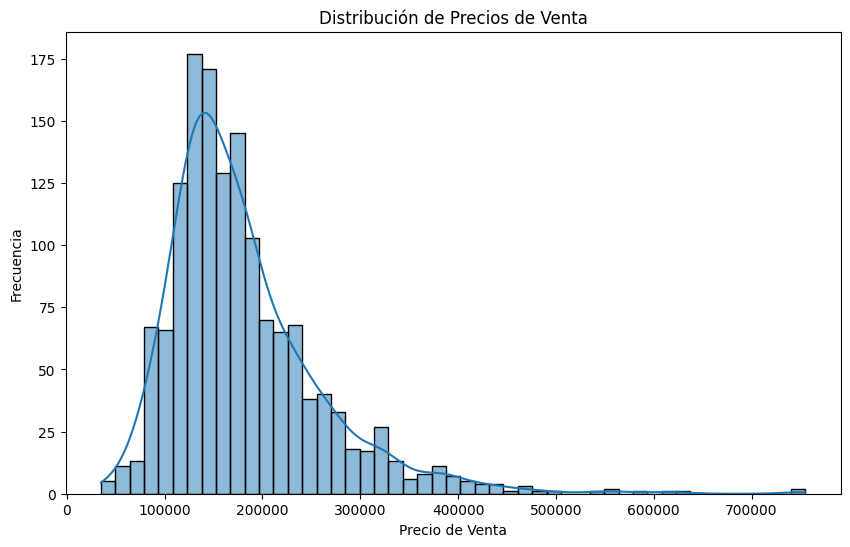

In [182]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

#### Vemos que la grafica tiene buena distribución aunque viendo mas detenidamente podemos ver que la grafica contiene algunos datos atípicos que pueden modificar el entrenamiento de los modelos de regresion si es que no se manejan de manera correcta. Se podria revisar algunos de estos datos para saber con mayor certeza si estos datos son importantes para nuestro análisis

## ¿Cómo se correlaciona el precio de venta con otras variables numéricas, como el tamaño del lote, el área habitable, el número de habitaciones?

In [183]:
numeric_vars = ['LotArea', 'GrLivArea', 'TotRmsAbvGrd']
correlation_matrix = df[['SalePrice'] + numeric_vars].corr()
print("Matriz de correlación con variables numéricas:\n", correlation_matrix)

Matriz de correlación con variables numéricas:
               SalePrice   LotArea  GrLivArea  TotRmsAbvGrd
SalePrice      1.000000  0.263843   0.708624      0.533723
LotArea        0.263843  1.000000   0.263116      0.190015
GrLivArea      0.708624  0.263116   1.000000      0.825489
TotRmsAbvGrd   0.533723  0.190015   0.825489      1.000000


#### Viendo esta matriz de correlación podemos ver como es que se relacionan algunas variables con la que estamos tratando de predecir, y de estas podemos resaltar que la variable mas cercana a SalePrice es la de GrLivArea, por lo que podriamos enfocar nuestra atencion a esta en el entrnamiento

## ¿Cómo varía el precio de venta en función de variables categóricas como el tipo de zona de zonificación, la ubicación del vecindario, la calidad general de la vivienda?

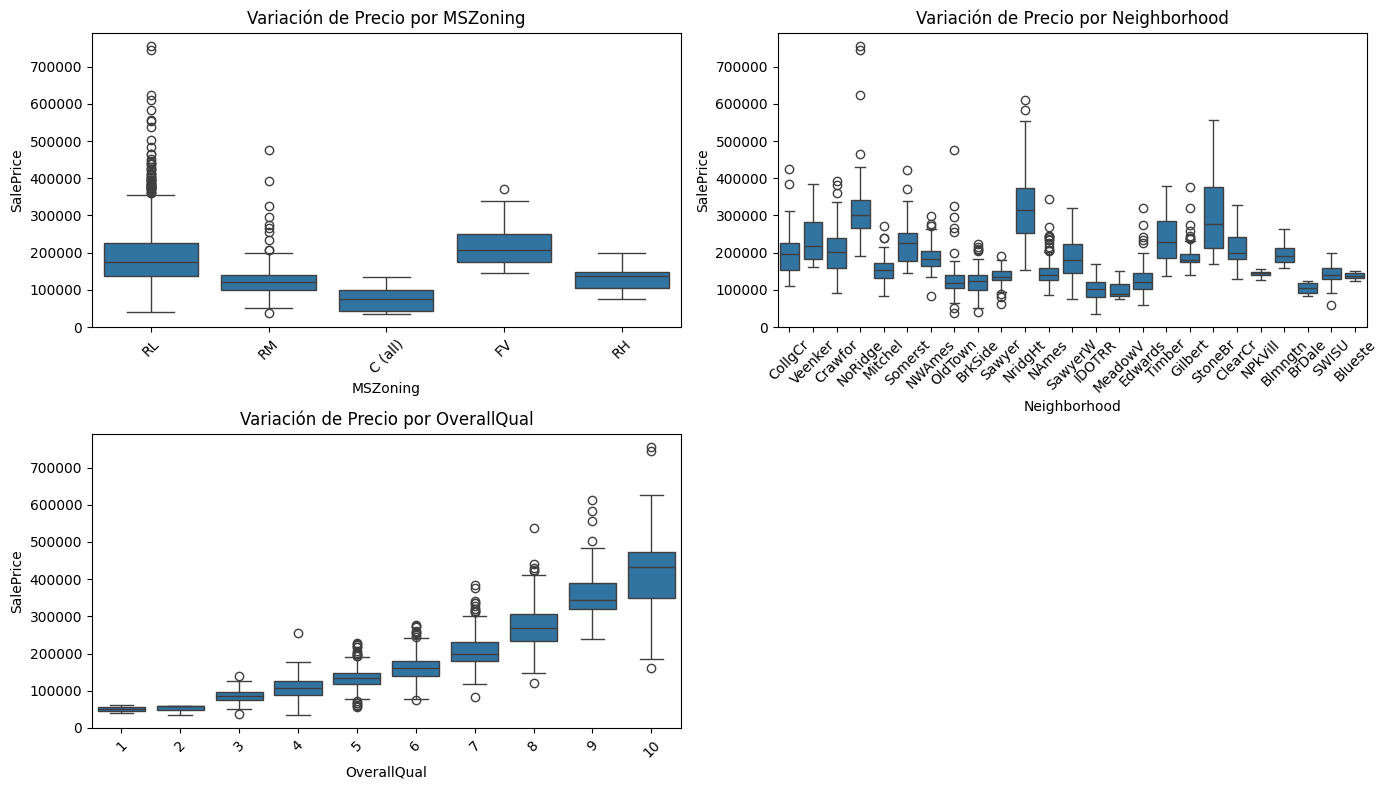

In [184]:
categorical_vars = ['MSZoning', 'Neighborhood', 'OverallQual']
plt.figure(figsize=(14, 8))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=var, y='SalePrice', data=df)
    plt.title(f'Variación de Precio por {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### En estas graficas podemos ver algunos datos que tan bien distribuidos estan. Vemos como es que en cada grafica se presentan una gran cantidad de datos atipicos, por lo que una buena clasificacion de variables y su limpieza, podrian resultar beneficiosas en el modelado

## ¿Hay alguna relación evidente entre el precio de venta y el año de construcción o el año de remodelación?

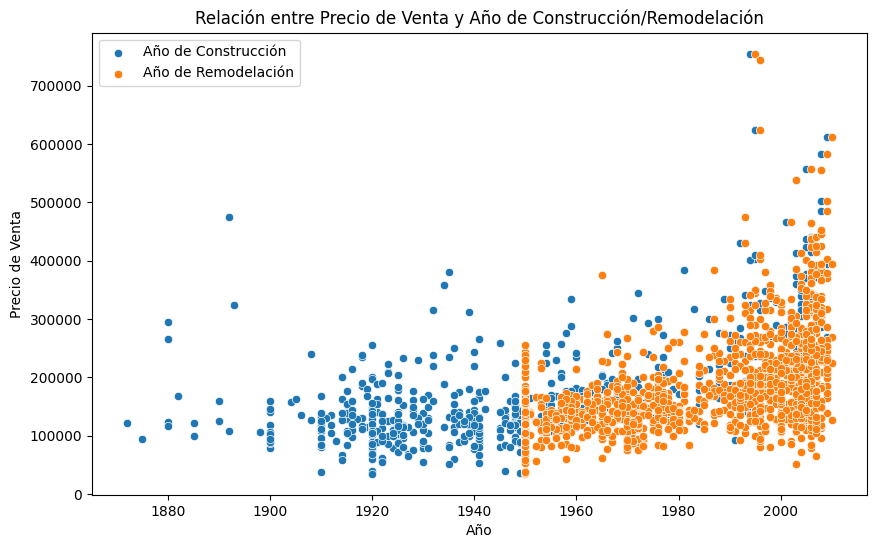

In [185]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df, label='Año de Construcción')
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=df, label='Año de Remodelación')
plt.title('Relación entre Precio de Venta y Año de Construcción/Remodelación')
plt.xlabel('Año')
plt.ylabel('Precio de Venta')
plt.legend()
plt.show()

## ¿Hay alguna relacion entre las casas que tengan piscina o no?

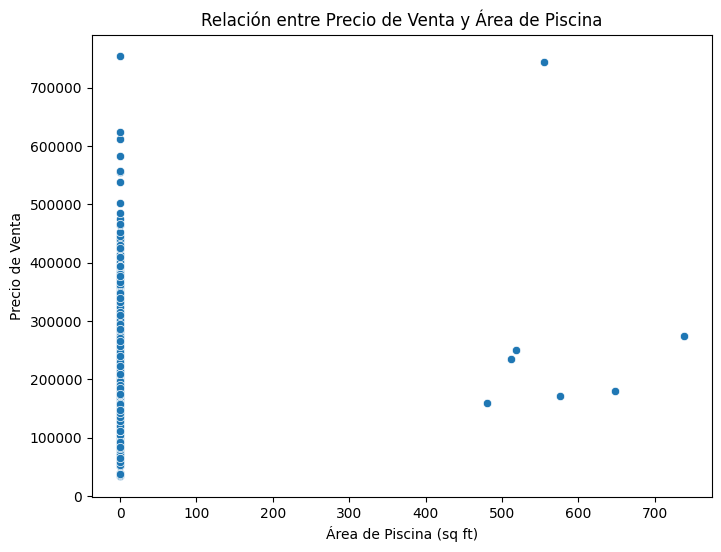

In [186]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PoolArea', y='SalePrice', data=df)
plt.title('Relación entre Precio de Venta y Área de Piscina')
plt.xlabel('Área de Piscina (sq ft)')
plt.ylabel('Precio de Venta')
plt.show()

#### Se puede ver que realmente el tener o no piscina no afecta al precio de las casas. Esto es por que las variables realmente no estan creciendo de manera lineal una con la otra.

## Relacion entre variables con diferentes tipos de comodidades y su precio

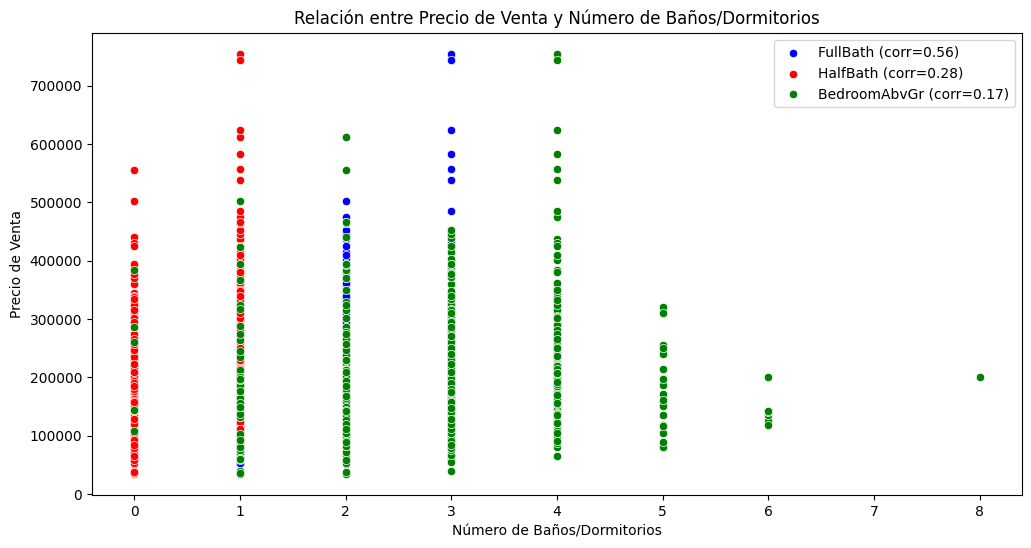

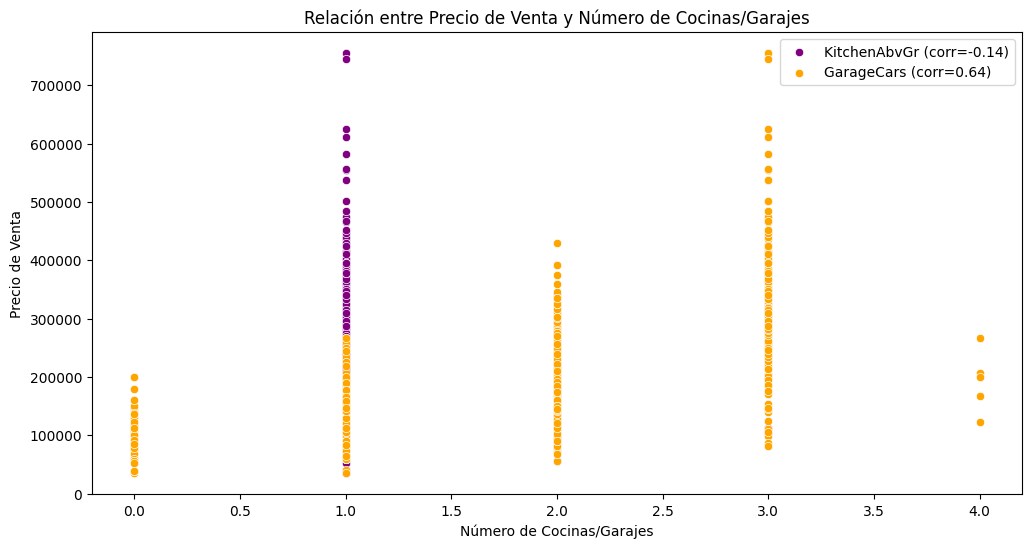

In [5]:
import numpy as np

# Calcular coeficientes de correlación
corr_fullbath = np.corrcoef(df['FullBath'], df['SalePrice'])[0, 1]
corr_halfbath = np.corrcoef(df['HalfBath'], df['SalePrice'])[0, 1]
corr_bedroom = np.corrcoef(df['BedroomAbvGr'], df['SalePrice'])[0, 1]
corr_kitchen = np.corrcoef(df['KitchenAbvGr'], df['SalePrice'])[0, 1]
corr_garagecars = np.corrcoef(df['GarageCars'], df['SalePrice'])[0, 1]

# Graficar la relación entre Precio de Venta y Número de Baños/Dormitorios
plt.figure(figsize=(12, 6))
sns.scatterplot(x='FullBath', y='SalePrice', data=df, color='blue', label=f'FullBath (corr={corr_fullbath:.2f})')
sns.scatterplot(x='HalfBath', y='SalePrice', data=df, color='red', label=f'HalfBath (corr={corr_halfbath:.2f})')
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=df, color='green', label=f'BedroomAbvGr (corr={corr_bedroom:.2f})')
plt.title('Relación entre Precio de Venta y Número de Baños/Dormitorios')
plt.xlabel('Número de Baños/Dormitorios')
plt.ylabel('Precio de Venta')
plt.legend()
plt.show()

# Graficar la relación entre Precio de Venta y Número de Cocinas/Garajes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='KitchenAbvGr', y='SalePrice', data=df, color='purple', label=f'KitchenAbvGr (corr={corr_kitchen:.2f})')
sns.scatterplot(x='GarageCars', y='SalePrice', data=df, color='orange', label=f'GarageCars (corr={corr_garagecars:.2f})')
plt.title('Relación entre Precio de Venta y Número de Cocinas/Garajes')
plt.xlabel('Número de Cocinas/Garajes')
plt.ylabel('Precio de Venta')
plt.legend()
plt.show()

#### Viendo estas graficas podemos ver de mejor manera si es que los diferentes sectores que estan incluidos dentro de las viviendas son relacionales con la variable dependiente. En este caso vemos que hay una mezca de muy poco relacionadas y algunas que si estan un poco mas relacionadas que la media. Vemos como de las principales, GarageCars y FullBath podrian ser una buena opción para que los tomemos en cuenta e investiguemos si es que estas relaciones se deben a datos atípico o no.

## Comparacion de grupos

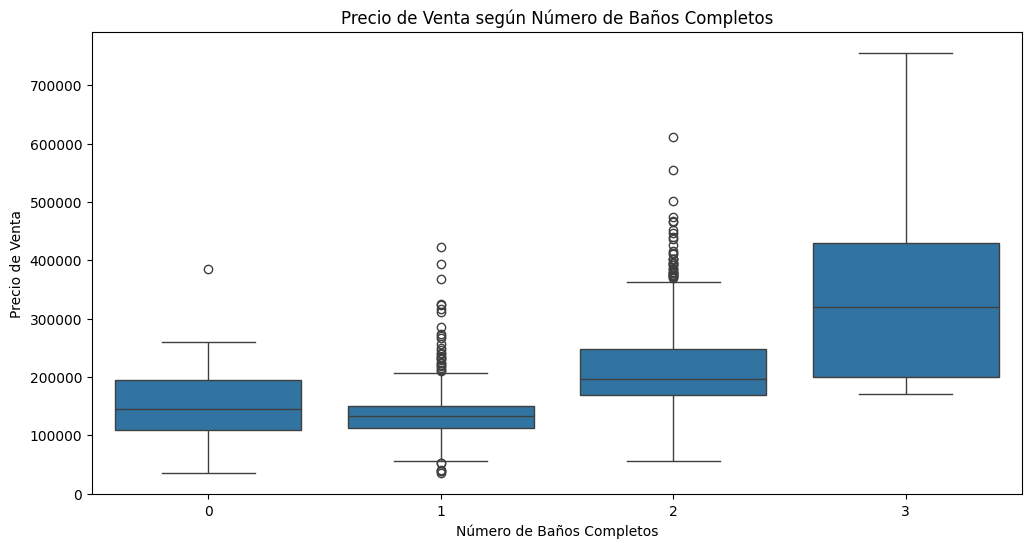

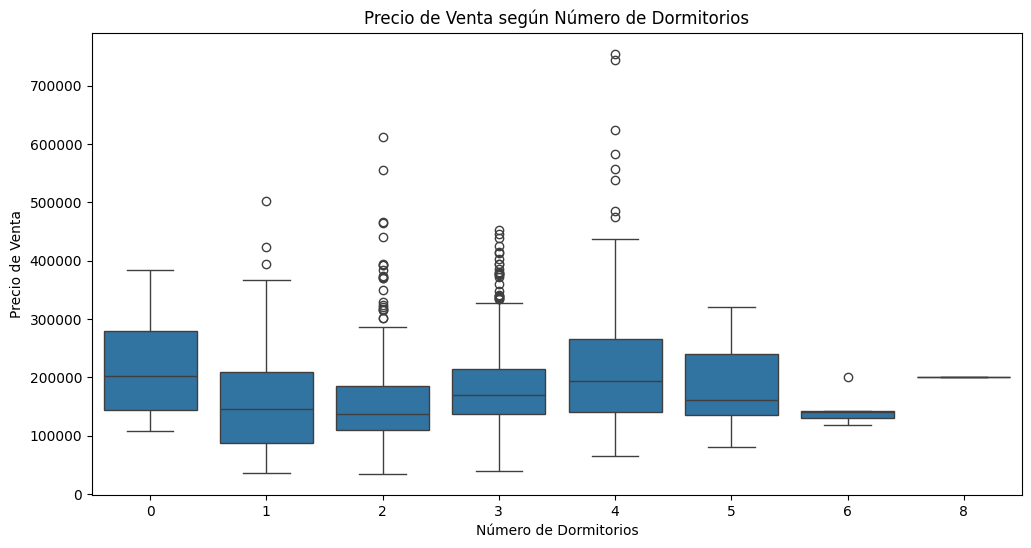

In [6]:
# Comparación entre grupos
plt.figure(figsize=(12, 6))
sns.boxplot(x='FullBath', y='SalePrice', data=df)
plt.title('Precio de Venta según Número de Baños Completos')
plt.xlabel('Número de Baños Completos')
plt.ylabel('Precio de Venta')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df)
plt.title('Precio de Venta según Número de Dormitorios')
plt.xlabel('Número de Dormitorios')
plt.ylabel('Precio de Venta')
plt.show()

#### Viendo los graficos de Caja y Bigotes de estas variables, podemos ver si es que si hay datos atípicos que pudieron afectar a las grafias que se mostraron anteriormente. Vemos que dentro de las graficas de baños completos, los datos con 2 o 3 baños se muestran con muchos atípicos. Esto nos puede decir que si pueden estar afectando pero de igual manera son una gran cantidad por lo que valdria la pena ver si estos son importantes en el dataframe o no. Luego en el de numero de dormitorios, vemos que el numero 1, 2, 3, 4 y 6 muestran datos atípicos, aunque podemos resaltar el numero 1, 4 y 6 que sus datos atípicos son bastante pocos, por lo que podriamos considerar buscar y eliminarlos para mejorar el proceso de modelado y entrenamiento.

## Matriz de correlación de variables en potencia

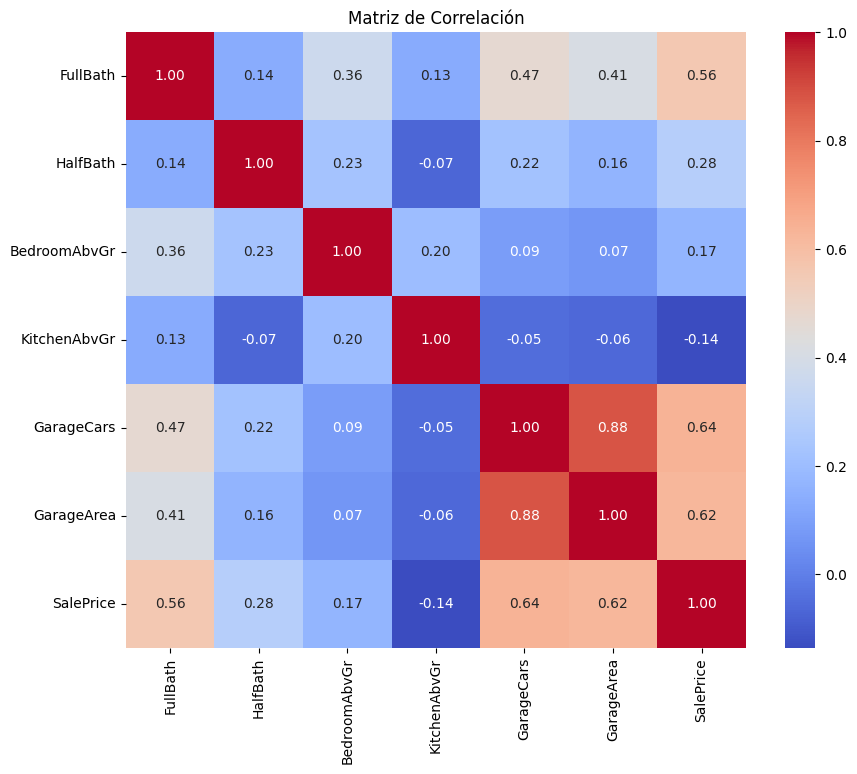

In [7]:
correlation_matrix = df[['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'GarageArea', 'SalePrice']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

#### Haciendo una matriz de correlacion podemos ver de mucha mejor manera si es que realmente vale la pena tomar en cuenta estas variables en nuestros siguientes pasos, y podemos ver que si seria una buena opcion hacer pruebas con cada una ya que se demostro que pueden contener valor dentro del modelado para la predicción.

## Descripción de variables
- MSSubClass: Clasificación de la propiedad según el tipo de construcción.
- MSZoning: Clasificación de la zona general.
- LotFrontage: Longitud de la calle conectada a la propiedad.
- LotArea: Tamaño del lote en pies cuadrados.
- Neighborhood: Ubicaciones físicas dentro de los límites de la ciudad de Ames.
- OverallQual: Calidad y acabado general de la casa.
- OverallCond: Calificación general del estado de la casa.
- YearBuilt: Fecha original de construcción.
- TotalBsmtSF: Total de pies cuadrados del sótano.
- GrLivArea: Área habitable sobre el nivel del suelo en pies cuadrados.
- FullBath: Número total de baños completos.
- HalfBath: Número total de baños medios (lavabos y retretes).
- BedroomAbvGr: Número total de dormitorios sobre el nivel del sótano.
- KitchenAbvGr: Número total de cocinas.
- GarageCars: Capacidad para automóviles en el garaje.
- GarageArea: Área del garaje en pies cuadrados.

## Data Split

In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [188]:
features = [
    'MSSubClass',  'LotFrontage', 'LotArea', 
    'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'GarageArea'
]
features_df = df[features]
features_df.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageCars,GarageArea
0,60,65.0,8450,7,5,2003,856,1710,2,1,3,1,2,548
1,20,80.0,9600,6,8,1976,1262,1262,2,0,3,1,2,460
2,60,68.0,11250,7,5,2001,920,1786,2,1,3,1,2,608


In [189]:
scaled_df = scaler.fit_transform(features_df[features])
scaled_df = pd.DataFrame(scaled_df, columns=features)
scaled_df['SalePrice'] = df['SalePrice']
scaled_df = scaled_df.dropna()
scaled_df.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageCars,GarageArea,SalePrice
0,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,-0.459303,0.370333,0.789741,1.227585,0.163779,-0.211454,0.311725,0.351000,208500
1,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,0.466465,-0.482512,0.789741,-0.761621,0.163779,-0.211454,0.311725,-0.060731,181500
2,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,-0.313369,0.515013,0.789741,1.227585,0.163779,-0.211454,0.311725,0.631726,223500


In [190]:
#PARA UNA VARIABLE
from sklearn.model_selection import train_test_split

X = scaled_df[['GrLivArea']]
y = scaled_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21562)

In [191]:
#PARA TODAS LAS VARIABLES
X_all = scaled_df.drop('SalePrice', axis=1)
y_all = scaled_df['SalePrice']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=21562)

## Regresión de una variable

In [192]:
from sklearn.linear_model import LinearRegression

classifier = LinearRegression()
classifier.fit(X_train, y_train)

classifier_preds = classifier.predict(X_test)

In [193]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, classifier_preds)
print('R²:', r2)

R²: 0.5207563764131764


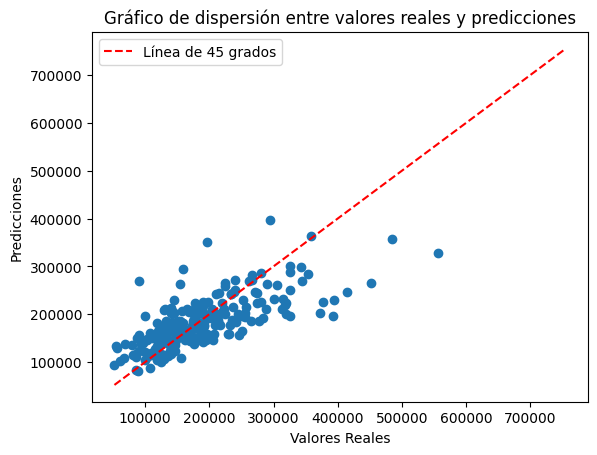

In [194]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, classifier_preds)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de dispersión entre valores reales y predicciones')

x_line = np.linspace(min(min(y_test), min(classifier_preds)), max(max(y), max(classifier_preds)), 100)
plt.plot(x_line, x_line, color='red', linestyle='--', label='Línea de 45 grados')

plt.legend()
plt.show()


## Regresión de todas las variables

In [195]:
all_classifier = LinearRegression()
all_classifier.fit(X_train_all, y_train_all)

all_classifier_preds = all_classifier.predict(X_test_all)

In [196]:
r2_all = r2_score(y_test_all, all_classifier_preds)
print('R²:', r2_all)

R²: 0.8320208002310143


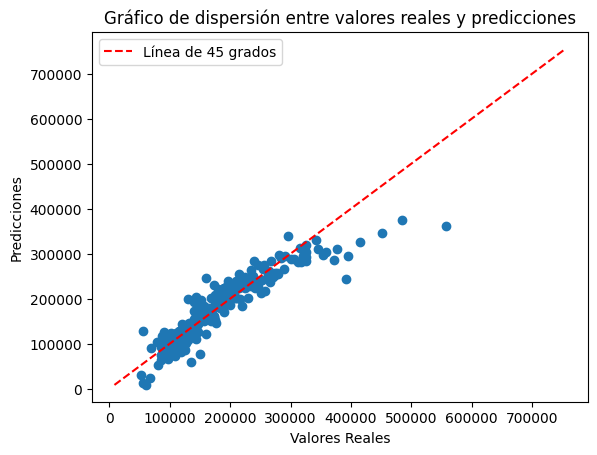

In [197]:
plt.scatter(y_test_all, all_classifier_preds)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de dispersión entre valores reales y predicciones')

x_line = np.linspace(min(min(y_test_all), min(all_classifier_preds)), max(max(y), max(all_classifier_preds)), 100)
plt.plot(x_line, x_line, color='red', linestyle='--', label='Línea de 45 grados')

plt.legend()
plt.show()


## Multicolinealidad

In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X_all.columns
vif_data["VIF"] = [variance_inflation_factor(X_all.values, i) for i in range(X_all.shape[1])]
vif_data

,Variable,VIF
0,MSSubClass,1.577393
1,LotFrontage,1.711444
2,LotArea,1.295238
3,OverallQual,3.175500
4,OverallCond,1.276532
5,YearBuilt,2.924954
6,TotalBsmtSF,2.306481
7,GrLivArea,4.807270
8,FullBath,2.680832
9,HalfBath,1.749670


### Analizando los resultados del factor de inflación de la varianza (VIF), no parece haber multicolinealidad. Usualmente esta se presenta para valores mayores a , mientras los mayores para las variables escogidas son de 5.3 y 5.5.

## Overfitting

In [199]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_all, y_train_all)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_all, y_train_all)

Ridge(alpha=0.1)

In [200]:
lasso_preds = lasso_model.predict(X_test_all)
ridge_preds = ridge_model.predict(X_test_all)

r2_lasso = r2_score(y_test_all, lasso_preds)
r2_ridge = r2_score(y_test_all, ridge_preds)
print('R² Lasso:', r2_lasso)
print('R² Ridge:', r2_ridge)

R² Lasso: 0.8320211472582209
R² Ridge: 0.832024418730299


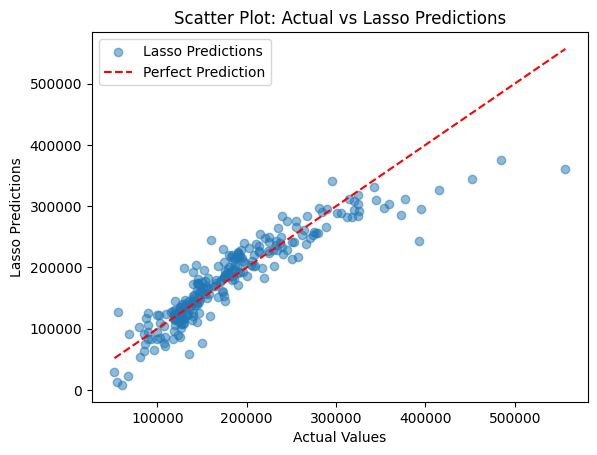

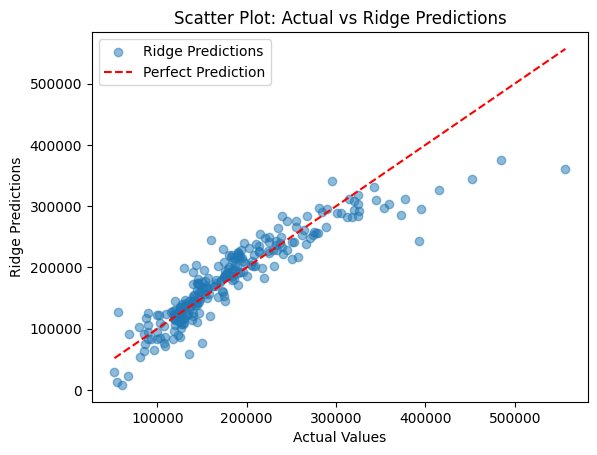

In [201]:

plt.scatter(y_test_all, lasso_preds, label='Lasso Predictions', alpha=0.5)
plt.plot([min(y_test_all), max(y_test_all)], [min(y_test_all), max(y_test_all)], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Lasso Predictions')
plt.title('Scatter Plot: Actual vs Lasso Predictions')
plt.legend()
plt.show()


plt.scatter(y_test_all, ridge_preds, label='Ridge Predictions', alpha=0.5)
plt.plot([min(y_test_all), max(y_test_all)], [min(y_test_all), max(y_test_all)], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Ridge Predictions')
plt.title('Scatter Plot: Actual vs Ridge Predictions')
plt.legend()
plt.show()


### No se podía verificar el overfitting del primer modelo solo con la métrica utilizada, por lo que se realizaron otros dos modelos, Lasso y Ridge. La característica de estos es que penalizan los coeficientes de las variables según un valor alpha, evitando el overfitting. Ambos modelos obtuvieron un valor de la métrica R2 aún mayor que el primer modelo, por lo que se puede decir que este no presenta el fenómeno.

## Eficiencia de los Modelos

### Todos los modelos se evaluaron con la métrica R2. El primero modelo (el de una variable) obtuvo un resultado pésimo, ya que una sola variable no es suficiente para obtener una predicción confiable. Luego, el resto de modelos obtuvieron buenos valores, sobrepasando el 0.80. Por lo que se puede decir que un modelo de regresión lineal de una variable no es nada efectivo, mientras que Ridge, Lasso o un modelo multivariable son muy efectivos.

## El mejor Modelo

### Realmente no existe diferencia alguna entre los últimos tres modelos. Cada uno obtuvo valores similares, incluso se puede decir que el mismo valor, en las métricas de desempeño. Cabe destacar que probablemente Lasso y/o Ridge tengan una mayor eficiencia si se expanden los datos o se incluyen nuevas variables, debido a su naturaleza.